In [2]:
#importa bibliotecas
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
#abre arquivo e importa em um dataframe
data = pd.read_csv('Fonte IBGE/CAGEDEST_122018.txt', encoding = 'ISO-8859-1', decimal = ',', delimiter = ';')

In [4]:
#Apresentas as colunas do dataset
data.columns

Index(['Admitidos/Desligados', 'Competência Declarada', 'Município',
       'Ano Declarado', 'CBO 2002 Ocupação', 'CNAE 1.0 Classe',
       'CNAE 2.0 Classe', 'CNAE 2.0 Subclas', 'Faixa Empr Início Jan',
       'Grau Instrução', 'Qtd Hora Contrat', 'IBGE Subsetor', 'Idade',
       'Ind Aprendiz', 'Ind Portador Defic', 'Raça Cor', 'Salário Mensal',
       'Saldo Mov', 'Sexo', 'Tempo Emprego', 'Tipo Estab', 'Tipo Defic',
       'Tipo Mov Desagregado', 'UF', 'Bairros SP', 'Bairros Fortaleza',
       'Bairros RJ', 'Distritos SP', 'Regiões Adm DF', 'Mesorregião',
       'Microrregião', 'Região Adm RJ', 'Região Adm SP', 'Região Corede',
       'Região Corede 04', 'Região Gov SP', 'Região Senac PR',
       'Região Senai PR', 'Região Senai SP', 'Sub-Região Senai PR',
       'Ind Trab Parcial', 'Ind Trab Intermitente'],
      dtype='object')

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,...,999,{ñ,99,999,99,{ñ,999,99,0,0
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1


In [33]:
#Mostra a quantidade de variáveis e parâmetros do dataset
data.shape

(2256752, 42)

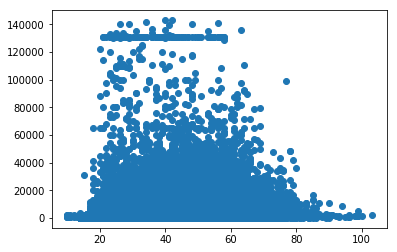

In [49]:
#Analisando a correlação da Idade x Salário Mensal

x1 = df['Idade']
x2 = df['Salário Mensal']

plt.scatter(x=x1,y=x2)

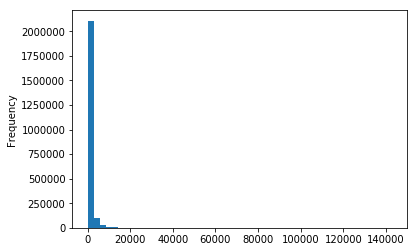

In [50]:
df['Salário Mensal'].plot.hist(bins=50)

In [35]:
#Seleciona as principais colunas para análise
df = data[['Admitidos/Desligados','Município','Ano Declarado','Grau Instrução','Idade','Raça Cor','Salário Mensal','Sexo','Tempo Emprego','UF']]
#Visualiza os dados
df.head()

,Admitidos/Desligados,Município,Ano Declarado,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo,Tempo Emprego,UF
0,1,500215,2018,6,24,8,954.0,1,0.0,50
1,1,500710,2018,8,25,2,2500.0,1,0.0,50
2,1,500460,2018,2,55,8,0.0,1,0.0,50
3,1,500460,2018,2,52,8,0.0,1,0.0,50
4,1,500460,2018,2,32,8,0.0,1,0.0,50


In [42]:
#Analisa a correção dos dados
df.corr()
#Hipótese 1: o salário é maior conforme o tempo de emprego

,Admitidos/Desligados,Município,Ano Declarado,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo,Tempo Emprego,UF
Admitidos/Desligados,1.000000,0.009665,NaN,-0.031150,0.110487,-0.039206,0.044920,-0.013509,0.332575,0.009635
Município,0.009665,1.000000,NaN,-0.012695,-0.012762,-0.149845,0.026354,0.027401,-0.005550,0.999744
Ano Declarado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grau Instrução,-0.031150,-0.012695,NaN,1.000000,-0.110878,-0.062680,0.184702,0.205090,0.041182,-0.013805
Idade,0.110487,-0.012762,NaN,-0.110878,1.000000,-0.036528,0.151294,-0.066302,0.276203,-0.013023
Raça Cor,-0.039206,-0.149845,NaN,-0.062680,-0.036528,1.000000,-0.077727,-0.059259,-0.092636,-0.147059
Salário Mensal,0.044920,0.026354,NaN,0.184702,0.151294,-0.077727,1.000000,-0.042394,0.201733,0.024928
Sexo,-0.013509,0.027401,NaN,0.205090,-0.066302,-0.059259,-0.042394,1.000000,0.009666,0.026933
Tempo Emprego,0.332575,-0.005550,NaN,0.041182,0.276203,-0.092636,0.201733,0.009666,1.000000,-0.005795
UF,0.009635,0.999744,NaN,-0.013805,-0.013023,-0.147059,0.024928,0.026933,-0.005795,1.000000


In [39]:
#Verifica se há retistros NaN e zeros na coluna mensal
vnulos = df['Salário Mensal'].isna().sum()
vzeros = df['Salário Mensal'].isnull().sum()
print('Qtd de Valores Nulos: ',vnulos)
print('Qtd de Valores zeros: ',vzeros)

Qtd de Valores Nulos:  0
Qtd de Valores zeros:  0


In [55]:
#calcula o desvio padrão 
df['Salário Mensal'].std()
        

2097.520546695418

In [44]:
# Cálculo da média de idade dos homens e mulheres

with open(r'demografia.csv', 'r') as data_csv:
    data = csv.reader(data_csv)
    
    lista_idade_homem = []
    lista_anos_homem = []
    soma_idade_homem = 0.0
    soma_anos_homem = 0.0
    for i, line in enumerate(data):
        if i>0:
            if line[3] == 'homem':
                soma_idade_homem +=  tira_zero(line[2])
                lista_idade_homem.append(line[2])                
                soma_anos_homem +=  tira_zero(line[4])
                lista_anos_homem.append(line[4])            

media_idade_homem = round(soma_idade_homem/len(lista_idade_homem),2)
media_anos_homem = round(soma_anos_homem/len(lista_anos_homem),2)

print(f'A idade média dos homens é de', media_idade_homem, 'anos e possuem em média', int(round(media_anos_homem,0)), 'de estudos.' )

with open(r'demografia.csv', 'r') as data_csv:
    data = csv.reader(data_csv)
    
    lista_idade_mulher = []
    lista_anos_mulher = []
    soma_idade_mulher = 0.0
    soma_anos_mulher = 0.0
    for i, line in enumerate(data):
        if i>0:
            if line[3] == 'mulher':
                soma_idade_mulher +=  tira_zero(line[2])
                lista_idade_mulher.append(line[2])                
                soma_anos_mulher +=  tira_zero(line[4])
                lista_anos_mulher.append(line[4])            

media_idade_mulher = round(soma_idade_mulher/len(lista_idade_mulher),2)
media_anos_mulher = round(soma_anos_mulher/len(lista_anos_mulher),2)

print(f'A idade média das mulheres é de', media_idade_mulher, 'anos e possuem em média', int(round(media_anos_mulher,0)), 'de estudos.' )

dif_idade = ''
if media_idade_homem < media_idade_mulher:
    txt_sexo = 'Os homens'
else:
    txt_sexo = 'As mulheres'

dif_idade = abs(media_idade_homem - media_idade_mulher)

print(txt_sexo,'são mais novos', dif_idade,'anos')

21     92666
23     92231
22     91791
24     90018
20     89764
19     89009
25     87011
26     81475
27     80172
29     78491
30     76741
28     76589
31     73130
32     71000
18     68862
33     68815
35     64288
34     64182
36     64149
37     60674
38     54700
39     52245
40     47987
41     44531
42     41047
43     38025
44     35561
45     32088
46     30997
47     28092
       ...  
75       201
76       161
77       129
78        97
79        69
80        58
81        33
83        27
82        18
84        16
10        15
85        15
86        12
11         9
90         8
96         8
12         7
13         6
89         5
87         4
88         4
99         3
93         2
91         2
98         2
100        1
95         1
94         1
92         1
103        1
Name: Idade, Length: 91, dtype: int64